/var/folders/k7/g4sgs1kn7w763_44_b21v97w0000gn/T/ipykernel_86218/2083651685.py:24: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pfade = np.array([Image.open('Cat1.jpeg'),Image.open('Cat2.jpeg'),Image.open('Cat3.jpeg'),Image.open('Cat4.jpeg'),Image.open('Cat5.jpeg'),Image.open('Cat6.jpeg'),Image.open('Cat7.jpeg'),Image.open('Cat8.jpeg'),Image.open('Cat9.jpeg'),Image.open('Cat10.jpeg')],dtype=object)


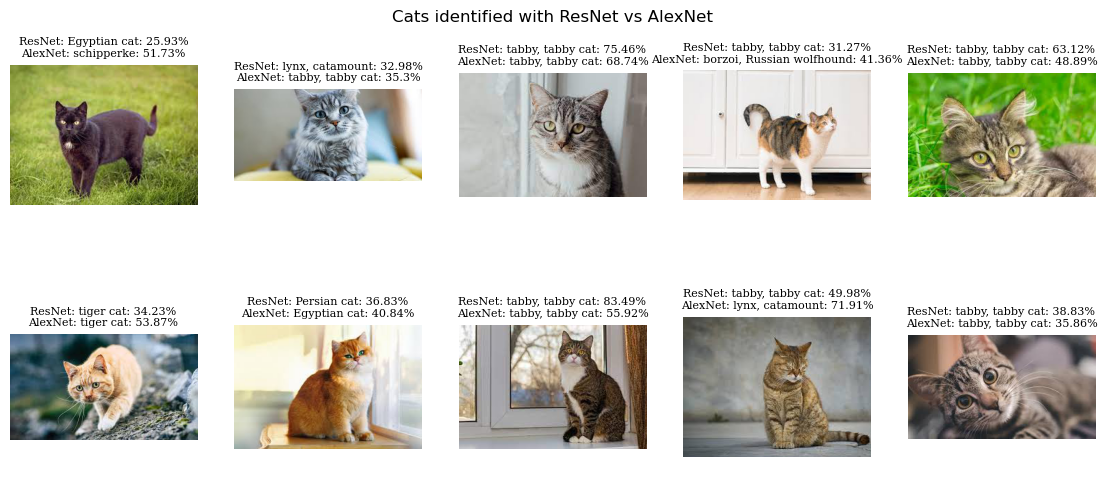

In [3]:
import torch
from torchvision import models
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Step 1: RexNET #########################################################

resnet = models.resnet101(pretrained = True)

with open('/Users/aronhemmis/Machine_Learning/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
)])

pfade = np.array([Image.open('Cat1.jpeg'),Image.open('Cat2.jpeg'),Image.open('Cat3.jpeg'),Image.open('Cat4.jpeg'),Image.open('Cat5.jpeg'),Image.open('Cat6.jpeg'),Image.open('Cat7.jpeg'),Image.open('Cat8.jpeg'),Image.open('Cat9.jpeg'),Image.open('Cat10.jpeg')],dtype=object)

indizes = np.zeros([10,1])
percentages = 0 
labels_erg = 0

for i in range (0,10):
    img_processed = preprocess(pfade[i])
    batch_t = torch.unsqueeze(img_processed,0)
    resnet.eval()
    out = resnet(batch_t)

    _, index = torch.max(out, 1)

    indizes[i] = index

    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    labels[index[0]], percentage[index[0]].item()

    percentages = np.append(percentages,str(round(percentage[index[0]].item(),2)))
    labels_erg = np.append(labels_erg,labels[index[0]])

# Step 2: AlexNET #########################################################

alexnet = models.alexnet(pretrained = True)

with open('/Users/aronhemmis/Machine_Learning/imagenet_classes.txt') as f:
    labels2 = [line.strip() for line in f.readlines()]

indizes2 = np.zeros([10,1])
percentages2 = 0
labels_erg2 = 0

for i in range (0,10):
    img_processed2 = preprocess(pfade[i])
    batch_t2 = torch.unsqueeze(img_processed2,0)
    alexnet.eval()
    out2 = alexnet(batch_t2)

    _, index2 = torch.max(out2, 1)

    indizes2[i] = index2

    percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
    labels2[index2[0]], percentage2[index2[0]].item()

    percentages2 = np.append(percentages2,str(round(percentage2[index2[0]].item(),2)))
    labels_erg2 = np.append(labels_erg2,labels2[index2[0]])

w = 10
h = 10
fig = plt.figure(figsize=(14, 6))
plt.title('Cats identified with ResNet vs AlexNet')
plt.axis('off')
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = pfade[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.axis('off')
    plt.title('ResNet: '+labels_erg[i]+': '+percentages[i]+'%'+'\n'+'AlexNet: '+labels_erg2[i]+': '+percentages2[i]+'%',
           family='serif', 
           color='black', 
           weight='normal', 
           size = 8)
plt.show()